# Libraries / Data

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score


# Import models
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

data_dir = "data/" # Define data path

In [3]:
df = pd.read_csv(data_dir + "food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index


df_cumulative = pd.read_csv("data/all_africa_southsudan.csv")
df_articles = pd.read_csv("data/articles_summary_cleaned.csv")
# Convert the 'date' column to datetime format for easier plotting
df_cumulative['date'] = pd.to_datetime(df_cumulative['date'])
df_cumulative
df_articles=pd.DataFrame(df_articles)
df_articles

# Load the dataset
data = pd.read_csv("data/articles_topics.csv")
brown_palette = sns.dark_palette("brown")
# Convert the 'date' column to datetime format for easier plotting
data['date'] = pd.to_datetime(data['date'])

78


# Plot 1 : IPC DISTRIBUTION

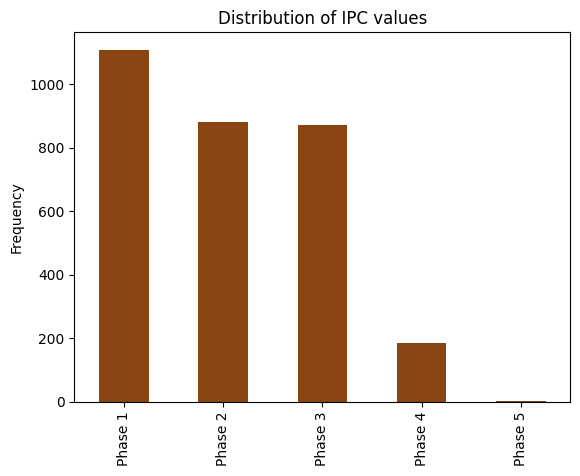

In [4]:
ax = df["ipc"].value_counts().plot(kind="bar",color='#8B4513',title="Distribution of IPC values") # Initialize barplot of fews_ipc counts
ax.set_xticklabels(["Phase {}".format(i) for i in range(1, 6)]) # Label the phases
ax.set_ylabel('Frequency'); # Set y label

# Plot 2 : Cumulative Distribution of Publishers

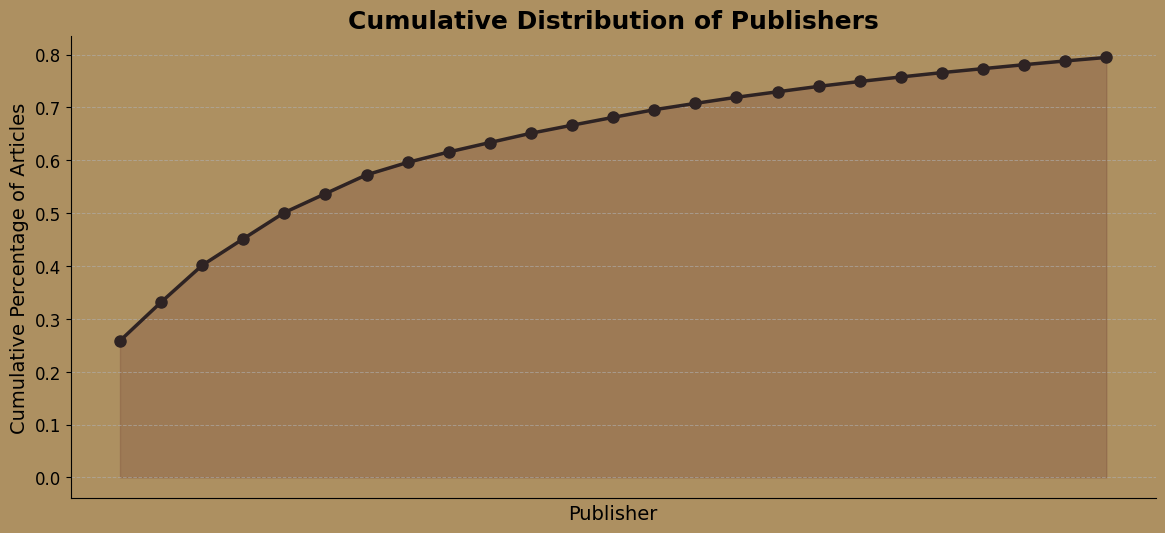

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

def visualize_publishers(data, top_n=25):
    """
    Visualizes a dataset of articles and publishers.

    :param data: DataFrame with at least 'publisher' column.
    :param top_n: Number of top publishers to display in the bar chart.
    """

    # Configure global plot settings
    plt.rcParams['axes.facecolor'] = '#ad9061'
    plt.rcParams['figure.facecolor']='#ad9061'
    # Cumulative Distribution of Publishers
    cumulative_dist = data['publisher'].value_counts(normalize=True).cumsum().head(top_n)
    
    # Using a palette and bars for the cumulative distribution
    palette = sns.dark_palette("brown")
    line_color = palette[0]
    fill_color = palette[2]

    cumulative_dist = data['publisher'].value_counts(normalize=True).cumsum()

    plt.figure(figsize=(14, 6))
    plt.plot(cumulative_dist.head(top_n).index, cumulative_dist.head(top_n).values, marker='o', color=line_color, linewidth=2.5, markersize=8)
    plt.fill_between(cumulative_dist.head(top_n).index, cumulative_dist.head(top_n).values, color=fill_color, alpha=0.2)

    plt.title('Cumulative Distribution of Publishers', fontsize=18, fontweight='bold')
    plt.xlabel('Publisher', fontsize=14)
    plt.ylabel('Cumulative Percentage of Articles', fontsize=14)
    plt.xticks([])  # This line hides the x tick labels
    plt.yticks(fontsize=12)

    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()
# Sample usage (assuming df is your data frame)
visualize_publishers(df_cumulative, top_n=25)


# Plot 3 Distributions of articles over time

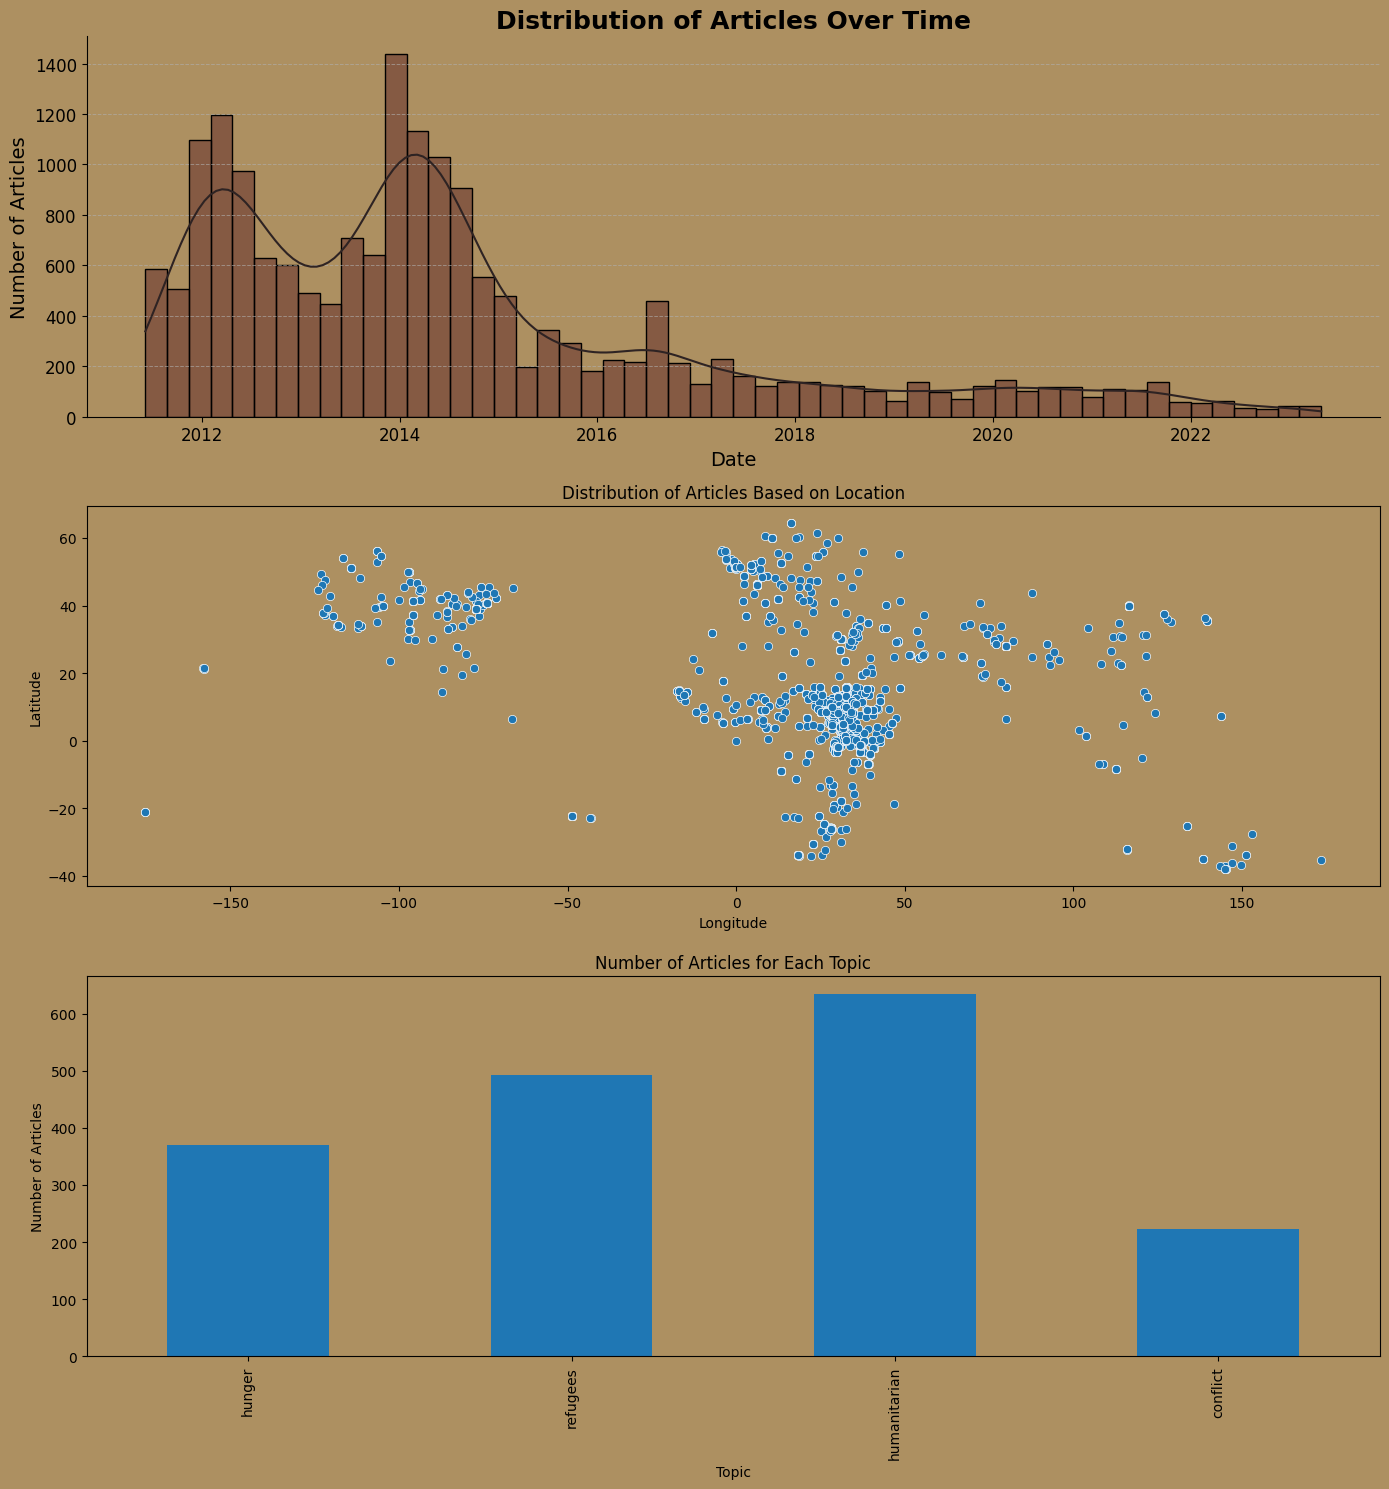

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set up the plots
fig, ax = plt.subplots(3, 1, figsize=(14, 15))

# Plot distribution of articles over time
palette = sns.dark_palette("brown")
bar_color = palette[2]
kde_color = palette[0]
ax[0].set_facecolor('#ad9061')
ax[1].set_facecolor('#ad9061')
ax[2].set_facecolor('#ad9061')

# Plot the histogram
sns.histplot(data=data, x='date', ax=ax[0], color=bar_color, kde=True)
ax[0].lines[0].set_color(kde_color)  # Set the KDE color
ax[0].set_title("Distribution of Articles Over Time", fontsize=18, fontweight='bold')
ax[0].set_xlabel("Date", fontsize=14)
ax[0].set_ylabel("Number of Articles", fontsize=14)

# Enhance tick labels and hide top/right spines
ax[0].tick_params(axis='both', labelsize=12)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Grid settings
ax[0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
# Plot distribution of articles based on location
sns.scatterplot(data=data, x='lng', y='lat', ax=ax[1])
ax[1].set_title("Distribution of Articles Based on Location")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")

# Plot distribution of articles for each topic
topics = ['hunger', 'refugees', 'humanitarian', 'conflict']
data_topics = data[topics].sum()
data_topics.plot(kind='bar', ax=ax[2])
ax[2].set_title("Number of Articles for Each Topic")
ax[2].set_xlabel("Topic")
ax[2].set_ylabel("Number of Articles")

plt.tight_layout()
plt.show()
